# Install libraries (if needed)

In [1]:
#install.packages( "tictoc" )
library( tictoc )

In [2]:
# This took ~ 7 minutes for me to complete in Google Colab
# tic()
# install.packages( c(
#     "tidymodels",
#     "GGally",
#     "ggfortify",
#     "ROCit",
#     "ranger",
#     "xgboost"
# ))
# toc()

# Import Libraries

In [3]:
library( tidyverse )
library( tidymodels )
library( GGally )
library( ggfortify )
library( ROCit )

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 0.2.0 ──

✔ broom        0.8.0     ✔ rsample      0.1.1
✔ dials        0.1.1     ✔ tune         0.2.0
✔ infer        1.0.0     ✔ wo

# Non-linearly separable data

In [4]:
funkydata <- read_csv( 'https://raw.githubusercontent.com/colettace/Revue_of_Models_for_StatInf_ML/master/day04_materials/funkydata.csv' )

Rows: 200 Columns: 7
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): Gaussian1, Gaussian2, Moon1, Moon2, Circle1, Circle2, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
dim( funkydata )

[1] 200   7

In [6]:
head( funkydata )

Gaussian1,Gaussian2,Moon1,Moon2,Circle1,Circle2,Y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.7994022,0.1545466,0.3378872,0.7223668,-0.5261698,0.9038196,0
-0.3301211,2.3876841,0.2182633,1.0285021,-0.7966583,0.5804428,0
1.6558677,0.6681260,-0.7572982,0.6764793,0.1200559,-1.0731062,0
1.4185881,-0.8775885,1.8573782,0.2101548,0.3124032,-0.1364299,1
-0.1880097,2.6413564,-0.3005245,0.7175567,-0.6291578,-0.9690414,0
-1.1174380,1.8842391,-0.5581630,0.9105472,-0.6317169,-0.7896364,0


In [7]:
funkydata$Y <- factor( funkydata$Y  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



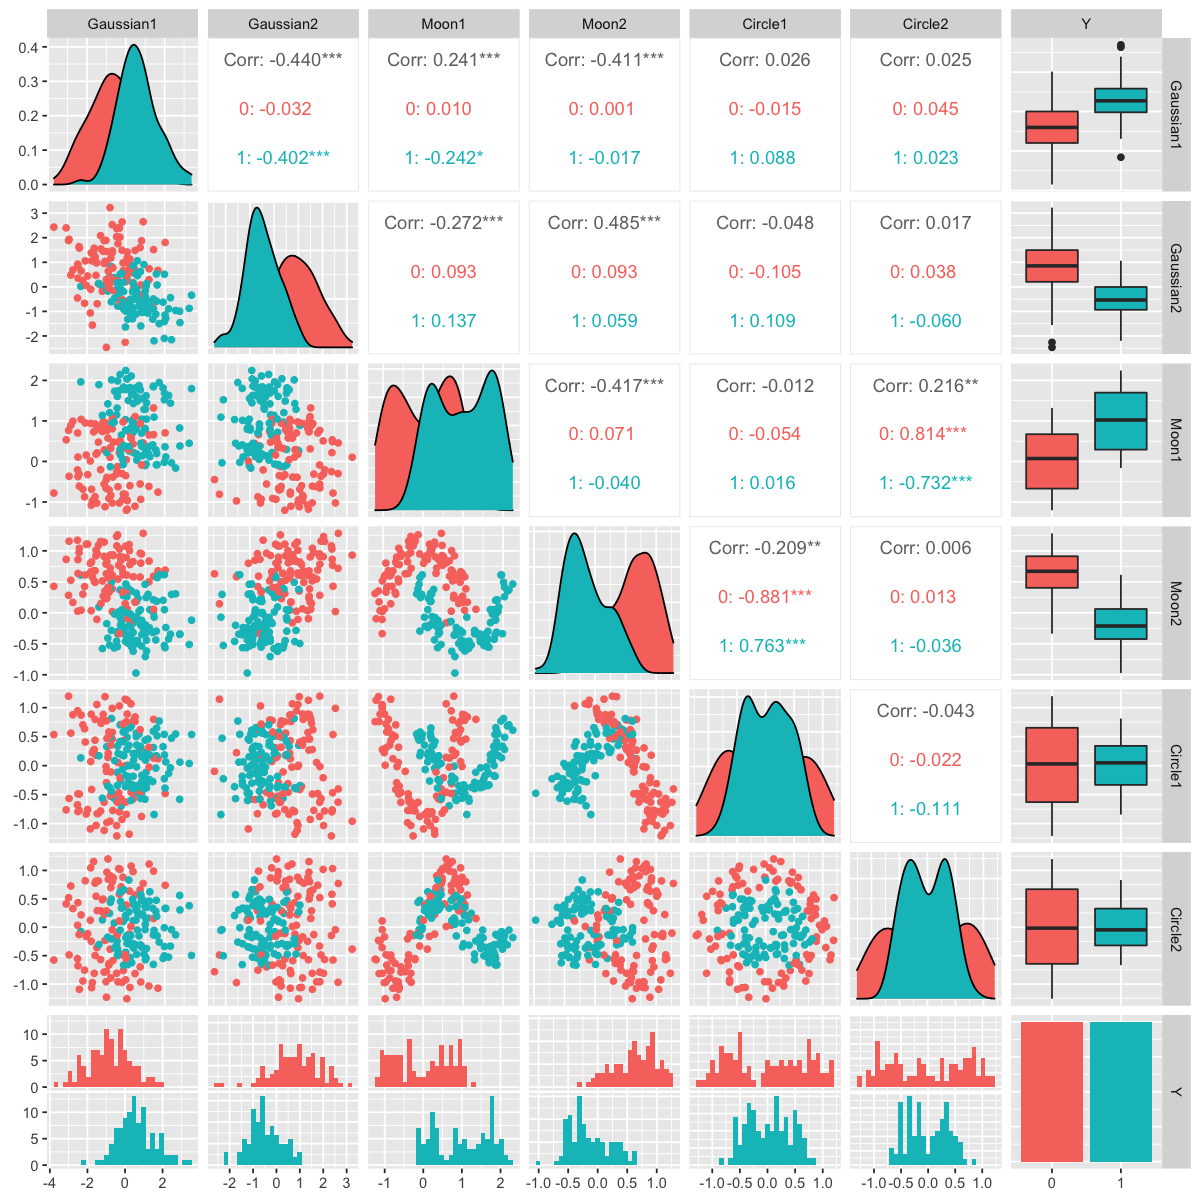

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
funkydata %>% ggpairs( aes( color=Y ) )

Rows: 200 Columns: 11
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`sta

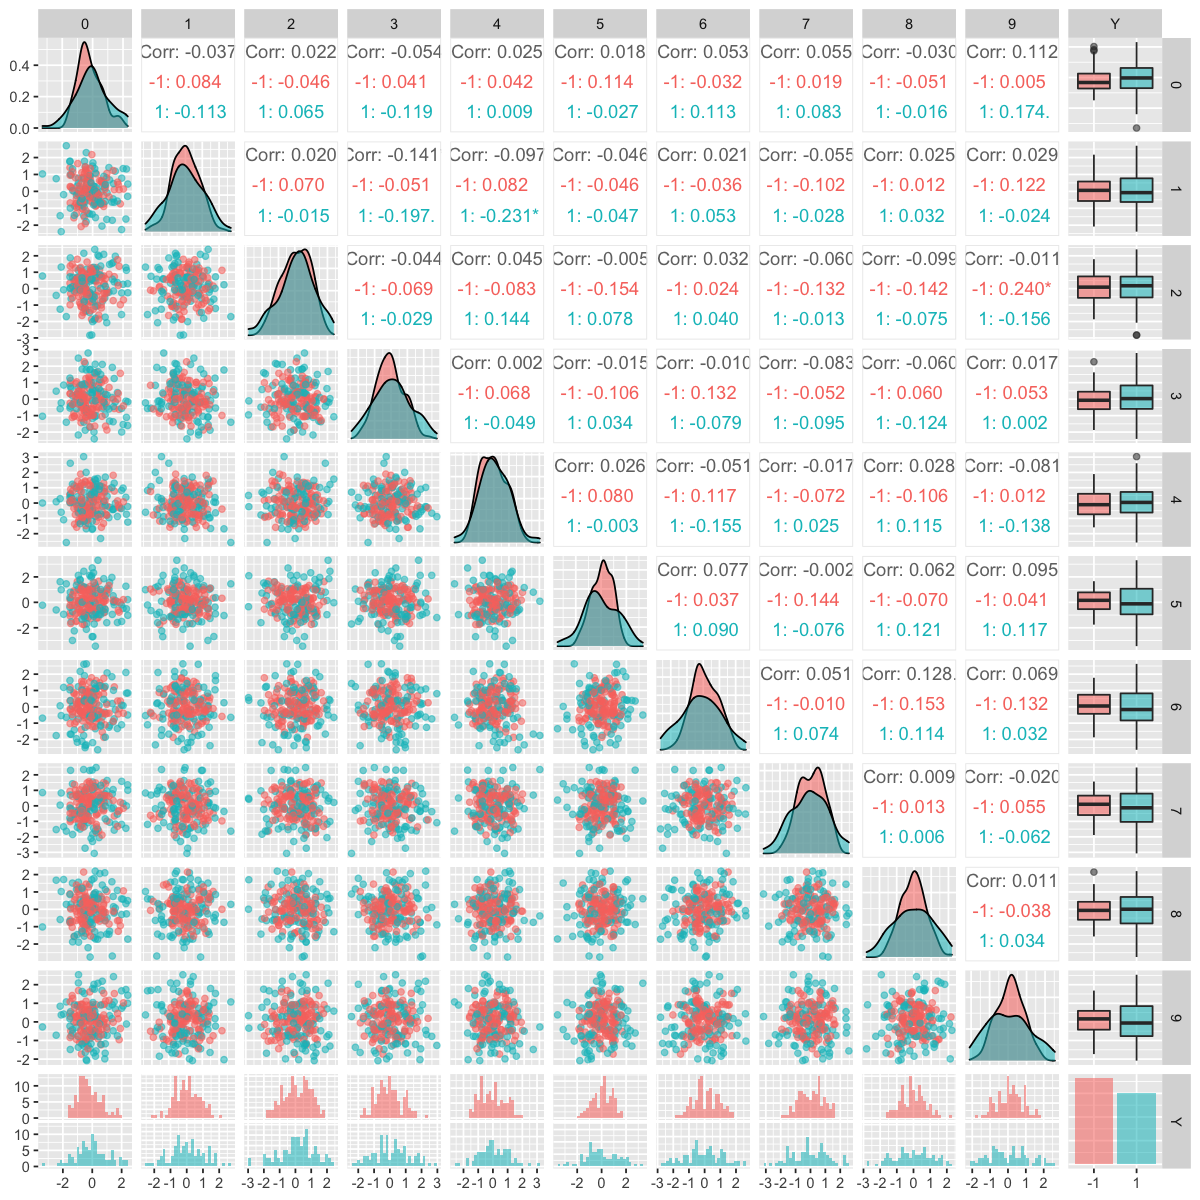

In [9]:
read_csv( 'https://raw.githubusercontent.com/colettace/Revue_of_Models_for_StatInf_ML/master/day04_materials/unequal_variance_data.csv' ) %>%
    mutate( Y=factor(Y) ) %>%
    ggpairs( aes( color=Y, alpha=0.1 ) )

# Funkydata: Hold some test data in reserve to assess model fit

In [10]:
set.seed( 42 )
data_splitter <- initial_split( funkydata, prop=0.8 )
train_data <- training( data_splitter )
test_data <- testing( data_splitter )

In [11]:
dim( train_data )

[1] 160   7

In [12]:
dim( test_data )

[1] 40  7

# Train a Logistic Regression model

* Plain vanilla logistic regression 

In [13]:
model0 <- glm( Y ~ 1, train_data, family='binomial' )

In [14]:
summary( model0 )


Call:
glm(formula = Y ~ 1, family = "binomial", data = train_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.209  -1.209   1.146   1.146   1.146  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.07504    0.15823   0.474    0.635

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 221.58  on 159  degrees of freedom
Residual deviance: 221.58  on 159  degrees of freedom
AIC: 223.58

Number of Fisher Scoring iterations: 3


In [15]:
model1 <- glm( Y ~ Gaussian1 + Gaussian2, train_data, family='binomial' )

In [16]:
summary( model1 )


Call:
glm(formula = Y ~ Gaussian1 + Gaussian2, family = "binomial", 
    data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.07395  -0.41709   0.07468   0.46161   2.02121  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.6363     0.2550   2.496   0.0126 *  
Gaussian1     1.0805     0.2541   4.252 2.12e-05 ***
Gaussian2    -1.8837     0.3471  -5.427 5.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 221.58  on 159  degrees of freedom
Residual deviance: 110.72  on 157  degrees of freedom
AIC: 116.72

Number of Fisher Scoring iterations: 6


In [17]:
anova( model0, model1 )

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,159,221.5820,NA,NA
2,157,110.7177,2,110.8643


## Use augment() function to attached fitted values to original data frame

In [18]:
augmented_funky1 <- augment( model1 )

In [19]:
augmented_funky1 %>% head 

Y,Gaussian1,Gaussian2,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-2.47702641,0.92347223,-3.779734,-0.21247157,-0.21366669,0.01115548,0.8422804,8.681471e-05
0,-1.96080333,0.44304474,-2.316974,-0.43361422,-0.43867256,0.02292908,0.8417217,7.891587e-04
1,0.05830344,-0.90737792,2.408470,0.41505273,0.41847694,0.01629817,0.8417876,5.050162e-04
1,1.61237531,0.07494858,2.237273,0.45039344,0.45589873,0.02400557,0.8416630,8.967285e-04
0,-1.75746682,1.05942979,-3.258341,-0.27470445,-0.27642794,0.01243084,0.8421634,1.633670e-04
1,2.78549049,-1.45826253,6.392927,0.05782651,0.05788017,0.00185325,0.8424414,1.037555e-06


## Plot distribution of TRAINING set fitted values colored by class

In [20]:
options(repr.plot.width=4, repr.plot.height=3)

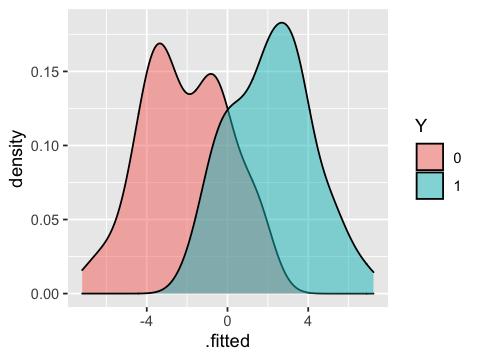

In [21]:
augmented_funky1 %>% ggplot( aes( x=.fitted, fill=Y) ) + geom_density( alpha=0.5 )

## Plot distribution of TEST set fitted values colored by class

In [22]:
Ypred_test <- predict( model1, test_data )

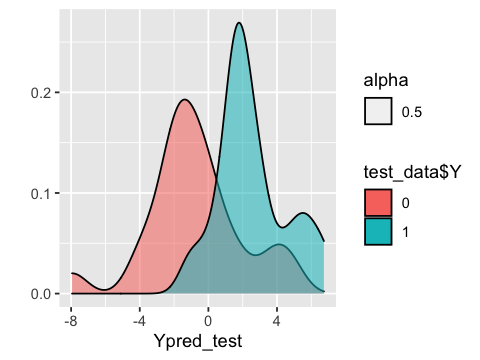

In [23]:
qplot( Ypred_test, geom='density', fill=test_data$Y, alpha=0.5 )

# Logit link function

* The target variable Y is binary (0/1, loss/win)
* The output is not a 0/1 directly, but the probability of a win
* Linear regression involves solving simultaneous linear equations => linear combinations
* Predicted values of a linear regression MUST also be linear. Consider:
    * $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + ... + \hat{\beta}_nx_n + \epsilon$ 
    * Use logit link function
    * $logit = log( Odds ) = log( \frac{p}{1-p} ) = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n + \epsilon$
    * logit function is a ["sigmoid" function](https://sebastianraschka.com/faq/docs/logistic-why-sigmoid.html)
* Exponentiate the coefficient to get the odds ratio - if bigger than 1, a 1 unit change in x is an increase
    * Odds ratio estimates = "times more likely" - probability of a win over probability of a loss

In [24]:
summary( model1 )


Call:
glm(formula = Y ~ Gaussian1 + Gaussian2, family = "binomial", 
    data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.07395  -0.41709   0.07468   0.46161   2.02121  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.6363     0.2550   2.496   0.0126 *  
Gaussian1     1.0805     0.2541   4.252 2.12e-05 ***
Gaussian2    -1.8837     0.3471  -5.427 5.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 221.58  on 159  degrees of freedom
Residual deviance: 110.72  on 157  degrees of freedom
AIC: 116.72

Number of Fisher Scoring iterations: 6


In [25]:
coef( model1 )

(Intercept)   Gaussian1   Gaussian2 
  0.6362583   1.0805138  -1.8836852

In [26]:
exp( coef( model1 ) )

(Intercept)   Gaussian1   Gaussian2 
  1.8893980   2.9461930   0.1520288

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



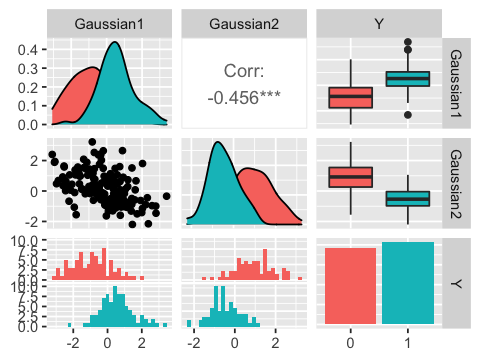

In [27]:
train_data %>% 
    select( Gaussian1, Gaussian2, Y ) %>%
    ggpairs( aes( fill=Y ) )

In [28]:
Ypred_test <- predict( model1, test_data )

In [29]:
head( Ypred_test )

1          2          3          4          5          6 
-0.7766576  4.1997126 -1.5032662 -4.0278080 -1.9549227  0.3463377

## Use type="response" argument to predict() to get probabilities

In [30]:
Ypred_test <- predict( model1, test_data, type='response' )

In [31]:
head(Ypred_test)

1          2          3          4          5          6 
0.31504069 0.98522178 0.18193889 0.01750157 0.12401758 0.58572920

## Classification metrics

* Goodness of fit is not adjusted R-squared, but rather accuracy, F1, ROC curve AUC, others...

In [32]:
length( Ypred_test )

[1] 40

In [33]:
head( Ypred_test )

1          2          3          4          5          6 
0.31504069 0.98522178 0.18193889 0.01750157 0.12401758 0.58572920

In [34]:
mean( as.numeric( Ypred_test > 0.5 ) == test_data$Y )

[1] 0.8

In [35]:
# In class activity 1: How to get test prediction accuracy?

In [36]:
# Homework: How to get four-square confusion matrix of TP/FP/FN/TN?

## ROC Curve 

* Receiver operator characteristic
* REquires probabilities to work
* [How to create a ROC curve](http://mlwiki.org/index.php/ROC_Analysis#Example_1)

In [37]:
ROCit_obj <- rocit( score = Ypred_test, class = test_data$Y )

In [38]:
options(repr.plot.width=4, repr.plot.height=4)

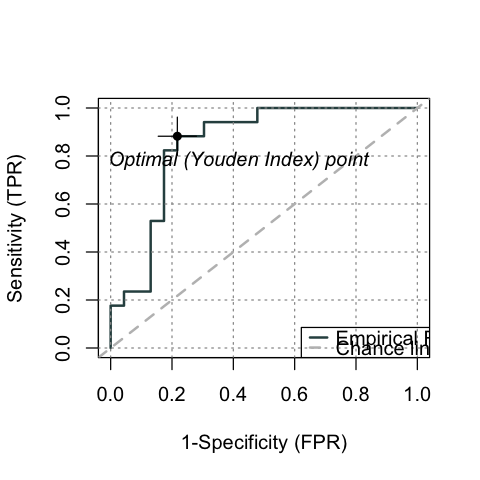

In [39]:
plot(ROCit_obj)

## Other Logistic regression considerations

### Categorical/nominal predictor variables
* One hot encoding: the creation of a dummy variable for each level, e.g.,
    * If you have a nominal variable with 12 cases, you just picked up 11 variables. Each one is going to have it's own coefficient.
* Options: change variable type to interval like an ordinal, or bin into "other" category

# Retrain GLM model with Parsnip interface (Tidyverse for modelling!)

* Parsnip is a unified modelling interface, allowing you to swap in and out classification algorithms easily

In [40]:
glm_fit <- logistic_reg() %>%
    set_engine( "glm" ) %>% 
    fit( Y ~ Gaussian1 + Gaussian2, train_data )

In [41]:
glm_fit

parsnip model object


Call:  stats::glm(formula = Y ~ Gaussian1 + Gaussian2, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)    Gaussian1    Gaussian2  
     0.6363       1.0805      -1.8837  

Degrees of Freedom: 159 Total (i.e. Null);  157 Residual
Null Deviance:	    221.6 
Residual Deviance: 110.7 	AIC: 116.7

In [42]:
glm_test_predictions <- glm_fit %>%
    predict( test_data ) %>%
    bind_cols( test_data )

In [43]:
sample_n( glm_test_predictions, 7 )

.pred_class,Gaussian1,Gaussian2,Moon1,Moon2,Circle1,Circle2,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.5704620,0.5242194,-0.08266246,-0.29561727,0.17115858,0.47415826,1
1,1.5457122,-1.1098034,0.28370608,-0.43815627,-0.04300102,0.27852605,1
1,-0.1300116,0.1871431,-0.07821408,0.27825127,0.57927695,0.09949454,1
1,2.0589611,-1.2810525,0.11145428,-0.23824116,0.06435647,0.33150403,1
1,-0.5710477,-0.4590166,1.73303412,-0.02129662,0.08584222,-0.36298196,1
1,1.0441428,-0.7342579,1.62134124,-0.29756429,-0.11499781,-0.53755393,1
1,1.2134165,-0.6016433,0.37254033,-0.24177992,-0.24111067,0.46080170,1


In [44]:
glm_test_predictions %>%
    yardstick::metrics( Y, .pred_class )

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.800000
kap,binary,0.608802


# Random Forest classifier

* [RF YouTube explainer](https://www.youtube.com/watch?v=D_2LkhMJcfY&t=165s)

In [45]:
rf_fit <- rand_forest() %>%
    set_engine( "ranger" ) %>%
    set_mode( "classification" ) %>% 
    fit( Y ~ Gaussian1 + Gaussian2, train_data )

In [46]:
rf_fit

parsnip model object

Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, num.threads = 1,      verbose = FALSE, seed = sample.int(10^5, 1), probability = TRUE) 

Type:                             Probability estimation 
Number of trees:                  500 
Sample size:                      160 
Number of independent variables:  2 
Mtry:                             1 
Target node size:                 10 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.1286279 

In [47]:
rf_test_predictions <- rf_fit %>%
    predict( test_data ) %>%
    bind_cols( test_data )

In [48]:
sample_n( rf_test_predictions, 7 )

.pred_class,Gaussian1,Gaussian2,Moon1,Moon2,Circle1,Circle2,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3.26366961,-0.8788645,0.44887539,-0.5111791,0.037088069,0.3786367,1
0,0.81184413,1.8763646,-0.08713043,0.9500149,-0.877042683,-0.3308256,0
0,-0.90289741,0.6402446,0.81652354,0.5629166,0.214471135,0.8439254,0
0,0.05448866,1.0087876,-0.95066569,0.6080864,0.006890235,-1.2584722,0
0,-0.69256180,1.3947951,0.80678982,0.6053824,0.572456174,0.8752464,0
0,-0.97017491,0.9474368,-0.39114679,0.8247762,-0.983245353,-0.2062242,0
0,-1.11067539,0.9533176,0.28494349,1.1407795,-1.117022375,0.2236662,0


In [49]:
rf_test_predictions %>%
    yardstick::metrics( Y, .pred_class )

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8250000
kap,binary,0.6551724


# XGBoost classifier

* Gradient-boosted classification trees [YouTube explainer](https://www.youtube.com/watch?v=0Xc9LIb_HTw)

In [50]:
xgb_fit <- boost_tree() %>%
    set_engine( "xgboost" ) %>%
    set_mode( "classification" ) %>% 
    fit( Y ~ Gaussian1 + Gaussian2, train_data )

[12:19:34] WARNING: ../../amalgamation/../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
xgb_fit

parsnip model object

##### xgb.Booster
raw: 28.2 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1, objective = "binary:logistic"), data = x$data, 
    nrounds = 15, watchlist = x$watchlist, verbose = 0, nthread = 1)
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", objective = "binary:logistic", nthread = "1", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 2 
niter: 15
nfeatures : 2 
evaluation_log:
    iter training_logloss
       1         0.525383
       2         0.425617
---                      
      14         0.144400
      15         0.139690

In [52]:
xgb_test_predictions <- xgb_fit %>%
    predict( test_data ) %>%
    bind_cols( test_data )

In [53]:
sample_n( xgb_test_predictions, 7 )

.pred_class,Gaussian1,Gaussian2,Moon1,Moon2,Circle1,Circle2,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.2134165,-0.60164334,0.37254033,-0.24177992,-0.2411107,0.4608017,1
1,0.3938438,-0.08247521,1.04137506,0.58091150,0.7810910,0.4032936,0
1,1.4293675,-0.64325092,0.66148906,0.59075731,0.1314410,0.9877415,0
0,0.0715979,1.17688822,-0.96693899,0.06382244,0.8893231,-0.1691161,0
0,-0.8358316,0.40048561,1.20377759,-0.52041253,-0.3737893,0.2450463,1
1,1.0451760,0.02597667,-0.06489091,0.24542509,0.2278580,0.1448821,1
0,-0.9947197,0.17949256,-0.66451551,0.89679138,-0.2940818,-1.2318677,0


In [54]:
xgb_test_predictions %>%
    yardstick::metrics( Y, .pred_class )

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7500000
kap,binary,0.5037221


In [55]:
mean( as.character(xgb_test_predictions$.pred_class) == 
 as.character(xgb_test_predictions$Y) )

[1] 0.75